# Imports

In [1]:
from encodings.utf_8 import encode
from time import sleep
import pandas as pd
import unidecode
import numpy as np
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
#from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import re

# Arquivos

In [4]:
pesquisa_lula = pd.read_csv("F:\\FAESA\\Teste de software\\lula.txt", sep="\r")
pesquisa_bolsonaro = pd.read_csv("F:\\FAESA\\Teste de software\\bolsonaro.txt", sep="\r")


# Tratamento de posts Lula

In [5]:
linhas_lula = pesquisa_lula.values.tolist()
post_lula = []
for dados in linhas_lula:
    for posts in dados:
        posts = unidecode.unidecode(posts)
        posts = posts.lower().replace("... ver mais", "")
        post_lula.append(posts) 

# Tratamento de posts BOLSONARO

In [6]:
linhas_bolosonaro = pesquisa_bolsonaro.values.tolist()
post_bolsonaro = []
for dados in linhas_bolosonaro:
    for posts in dados:
        posts = unidecode.unidecode(posts)
        posts = posts.lower().replace("... ver mais", "")
        post_bolsonaro.append(posts) 

# TF LULA

In [7]:
coun_vect = CountVectorizer()
count_matrix_lula = coun_vect.fit_transform(post_lula)
count_array_lula = count_matrix_lula.toarray()
df_lula = pd.DataFrame(data=count_array_lula,columns = coun_vect.get_feature_names())
df_lula

C:\Users\Nicole\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,05,07,10,11,13,14,15,17,18,1990,...,voltarao,votacao,votar,votarei,vote,vote13,vote22,voto,votos,zema
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF BOLSONARO

In [8]:
coun_vect = CountVectorizer()
count_matrix_bolsonaro = coun_vect.fit_transform(post_bolsonaro)
count_array_bolsonaro = count_matrix_bolsonaro.toarray()
df_bolsonaro = pd.DataFrame(data=count_array_bolsonaro,columns = coun_vect.get_feature_names())
df_bolsonaro

C:\Users\Nicole\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,05,06,07,10,100,11,12,13,14,15,...,votarmos,vote,vote13,vote22,voto,votos,www,xoraoaline,zema,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TFIDF LULA

In [9]:
vectorizer_lula = TfidfVectorizer()
X_lula = vectorizer_lula.fit_transform(post_lula)
vectorizer_lula.get_feature_names()
X_Array_lula = X_lula.toarray()
df1_lula = pd.DataFrame(data=X_Array_lula,columns = vectorizer_lula.get_feature_names())
df1_lula

C:\Users\Nicole\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,05,07,10,11,13,14,15,17,18,1990,...,voltarao,votacao,votar,votarei,vote,vote13,vote22,voto,votos,zema
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240619,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0


# TFIDF BOLSONARO

In [10]:
vectorizer_bolsonaro = TfidfVectorizer()
X_bolsonaro = vectorizer_bolsonaro.fit_transform(post_bolsonaro)
vectorizer_bolsonaro.get_feature_names()
X_Array_bolsonaro = X_bolsonaro.toarray()
df1_bolsonaro = pd.DataFrame(data=X_Array_bolsonaro,columns = vectorizer_bolsonaro.get_feature_names())
df1_bolsonaro

C:\Users\Nicole\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,05,06,07,10,100,11,12,13,14,15,...,votarmos,vote,vote13,vote22,voto,votos,www,xoraoaline,zema,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# IDF LULA

In [11]:
divisao_lula = df1_lula/df_lula
divisao_lula.fillna(0)

,05,07,10,11,13,14,15,17,18,1990,...,voltarao,votacao,votar,votarei,vote,vote13,vote22,voto,votos,zema
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240619,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


# IDF BOLSONARO

In [12]:
divisao_bolsonaro = df1_bolsonaro/df_bolsonaro
divisao_bolsonaro.fillna(0)

,05,06,07,10,100,11,12,13,14,15,...,votarmos,vote,vote13,vote22,voto,votos,www,xoraoaline,zema,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
dataset_lula = X_Array_lula
dataset_bolsonaro = X_Array_bolsonaro

# Análise de sentimento LULA

In [14]:
# determining the maximum number of clusters 
# using the simple method
limit_lula = int((dataset_lula.shape[0]//2)**0.5)
  
# selecting optimal value of 'k'
# using elbow method
  
# wcss - within cluster sum of
# squared distances
wcss_lula = {}
  
for k in range(2,limit_lula+1):
    model_lula = KMeans(n_clusters=k)
    model_lula.fit(dataset_lula)
    wcss_lula[k] = model_lula.inertia_      


In [15]:
keys_lula = wcss_lula.keys() 
values_lula = wcss_lula.values()

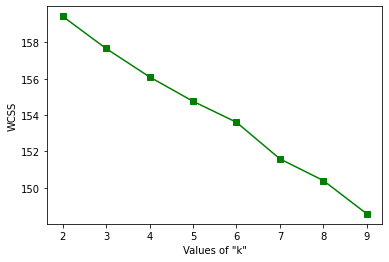

In [16]:
# plotting the wcss values
# to find out the elbow value
plt.plot(keys_lula, values_lula, 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

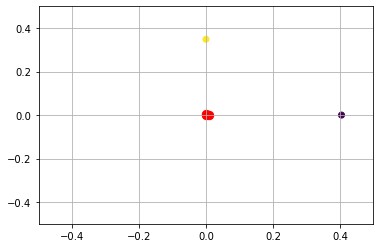

In [17]:
kmeans_lula = KMeans(n_clusters = 3, #numero de clusters
                
init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva

max_iter = 300) #numero máximo de iterações

pred_y_lula = kmeans_lula.fit_predict(dataset_lula)

plt.scatter(dataset_lula[:,1], dataset_lula[:,0], c = pred_y_lula) #posicionamento dos eixos x e y
plt.xlim(-0.5, 0.5) #range do eixo x
plt.ylim(-0.5, 0.5) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans_lula.cluster_centers_[:,1],kmeans_lula.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

In [18]:
kmeans_lula.labels_

array([0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0,
       1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0])

In [19]:
df_lula["cluster"] = kmeans_lula.labels_
df_lula.columns

Index(['05', '07', '10', '11', '13', '14', '15', '17', '18', '1990',
       ...
       'votacao', 'votar', 'votarei', 'vote', 'vote13', 'vote22', 'voto',
       'votos', 'zema', 'cluster'],
      dtype='object', length=1462)

In [20]:
dfposts_lula = pd.DataFrame(post_lula, columns=["Posts"])
dfposts_lula["cluster"] = kmeans_lula.labels_
dfposts_lula

,Posts,cluster
0,"em sao bernardo, onde tudo comecou, com fernan...",0
1,lula e haddad em caminhada em sao bernardo do ...,0
2,nao e verdade que o candidato do pt a presiden...,2
3,"de propina no pneu a onibus superfaturado, pas...",0
4,lula recebe apoio de politicos do psd,2
...,...,...
164,#humor #comedia #risadas #lula #bolsonaro #ney...,2
165,ret : sob censura jovem pan oficialmente cens...,1
166,lula foi ao complexo do alemao e caminhou com ...,0
167,entendo o lula tentar fugir. a verdade incomo...,2


In [21]:
dfposts_lula[dfposts_lula.cluster == 2].sample(5).values

array([['o expresidente e candidato petista a presidencia da republica luiz inacio lula da silva (pt) desembarcou no recife na noite desta quintafeira (13) para participar de evento da sua campanha nesta sextafeira (14) na capital pernambucana. lula, que neste segundo turno apoia a candidatura de marilia arraes (solidariedade) ao governo de pernambuco, foi recebido por aliado petistas, como o senador humberto costa, e o prefeito do recife, joao campos (psb)  que na eleicao de 2020',
        2],
       ['evangelica ha mais de 20 anos, marina silva enfrenta mentiras da familia bolsonaro sobre lula espalhadas aos cristaos.',
        2],
       ['lula, guardiao dos territorios | cerimonia de protecao de lula hoje durante encontro com liderancas indigenas do maranhao. o expresidente recebeu uma lanca krepur, representando o titulo de guardiao dos territorios. ',
        2],
       ['#bolsonaro #bolsonaro2022 #bolsonaro2023 #nicholasferreira # nicolasferreira #carlazambelli #simonetebet #cir

In [22]:
condicoes = [(dfposts_lula['cluster'] == 0), 
             (dfposts_lula['cluster'] == 1), 
             (dfposts_lula['cluster'] == 2)]
opcoes = ["negativo", "neutro", "positivo"]
dfposts_lula['sentimento'] = np.select(condicoes, opcoes)

In [23]:
dfposts_lula

,Posts,cluster,sentimento
0,"em sao bernardo, onde tudo comecou, com fernan...",0,negativo
1,lula e haddad em caminhada em sao bernardo do ...,0,negativo
2,nao e verdade que o candidato do pt a presiden...,2,positivo
3,"de propina no pneu a onibus superfaturado, pas...",0,negativo
4,lula recebe apoio de politicos do psd,2,positivo
...,...,...,...
164,#humor #comedia #risadas #lula #bolsonaro #ney...,2,positivo
165,ret : sob censura jovem pan oficialmente cens...,1,neutro
166,lula foi ao complexo do alemao e caminhou com ...,0,negativo
167,entendo o lula tentar fugir. a verdade incomo...,2,positivo
